### Reading Libraries and Dataset

In [386]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [349]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [350]:
df = pd.read_csv('C:/Users/amitr/Desktop/default of credit card clients.csv')

In [290]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Preprocessing and EDA

In [291]:
corr = df[df.columns[1:]].corr()['dpnm'][:]

In [292]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

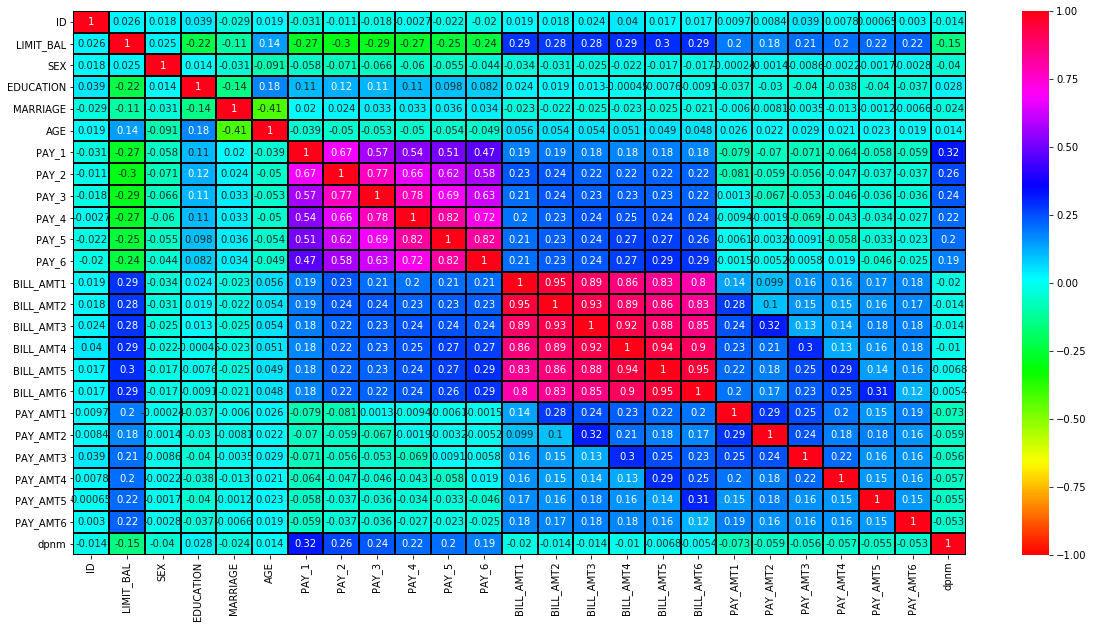

In [293]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'hsv', linecolor='black', linewidth=1)

In [294]:
corr

LIMIT_BAL   -0.153520
SEX         -0.039961
EDUCATION    0.028006
MARRIAGE    -0.024339
AGE          0.013890
PAY_1        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
dpnm         1.000000
Name: dpnm, dtype: float64

ValueError: markers must be a singeton or a list of markers for each level of the hue variable

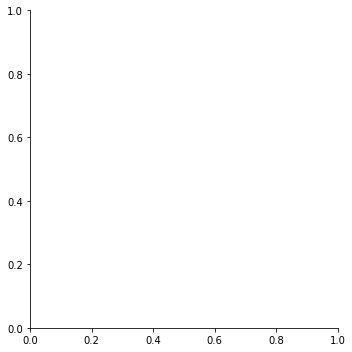

In [295]:
sns.lmplot(x='dpnm', y='EDUCATION', data = df, hue='ID', markers=['o','v'], scatter_kws={'s':50})

In [351]:
dummies = pd.get_dummies(df.SEX)   # One hot encoding the SEX column
df = pd.concat([df, dummies], axis=1)
del df['SEX']

In [352]:
dummies = pd.get_dummies(df.EDUCATION)   # One hot encoding the EDUCATION column
df = pd.concat([df, dummies], axis=1)
del df['EDUCATION']

In [353]:
dummies = pd.get_dummies(df.MARRIAGE)   # One hot encoding the MARRIAGE column
df = pd.concat([df, dummies], axis=1)
del df['MARRIAGE']

In [362]:
df[1] = df[1].astype(object)
df[2] = df[2].astype(object)
df[0] = df[0].astype(object)
df[1] = df[1].astype(object)
df[2] = df[2].astype(object)
df[3] = df[3].astype(object)
df[4] = df[4].astype(object)
df[5] = df[5].astype(object)
df[6] = df[6].astype(object)

In [394]:
df.dtypes

ID            int64
LIMIT_BAL     int64
AGE           int64
PAY_1         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
dpnm          int64
1            object
2            object
0            object
1            object
2            object
3            object
4            object
5            object
6            object
0            object
1            object
2            object
3            object
dtype: object

In [ ]:
df.columns

### Train Test Split

In [354]:
X = df.drop('dpnm', axis = 1)
y = df['dpnm']

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [356]:
y_test.head()

2308     0
22404    0
23397    0
25058    0
2664     1
Name: dpnm, dtype: int64

### Logistic Regression

In [296]:
lr = LogisticRegression()

In [297]:
lr.fit(X_train, y_train)

C:\Users\amitr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [298]:
prediction = lr.predict(X_test)

In [299]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7058
           1       0.00      0.00      0.00      1942

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



In [300]:
confusion_matrix(y_test, prediction)

array([[7056,    2],
       [1942,    0]], dtype=int64)

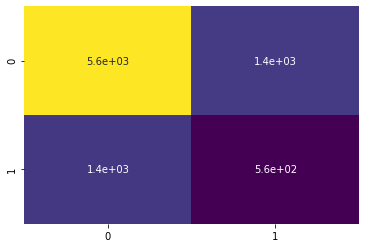

In [301]:
sns.heatmap(cm, annot=True, cbar=False, cmap='viridis')

### K Nearest Classifier

In [302]:
knn = KNeighborsClassifier(n_neighbors=1)

In [303]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [304]:
pred = knn.predict(X_test)

In [305]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7058
           1       0.28      0.29      0.28      1942

    accuracy                           0.69      9000
   macro avg       0.54      0.54      0.54      9000
weighted avg       0.69      0.69      0.69      9000



In [306]:
cm1 = confusion_matrix(y_test, pred)
cm1

array([[5615, 1443],
       [1382,  560]], dtype=int64)

### Random Forest Classifier

In [308]:
rf = RandomForestClassifier(n_estimators=200)

In [309]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [310]:
Predictions = rf.predict(X_test)

In [311]:
print(confusion_matrix(y_test, Predictions))
print('\n')
print(classification_report(y_test, Predictions))

[[6666  392]
 [1249  693]]


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.64      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



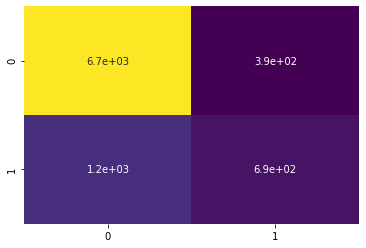

In [312]:
sns.heatmap(confusion_matrix(y_test, Predictions), annot=True, cbar=False, cmap='viridis')

In [313]:
df['dpnm'].value_counts()

0    23364
1     6636
Name: dpnm, dtype: int64

### Decision Tree Classifier

In [314]:
ds = DecisionTreeClassifier()

In [315]:
ds.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [316]:
Predictions = ds.predict(X_test)

In [317]:
print(confusion_matrix(y_test, Predictions))
print('/n')
print(classification_report(y_test, Predictions))

[[5748 1310]
 [1110  832]]
/n
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      7058
           1       0.39      0.43      0.41      1942

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.62      9000
weighted avg       0.74      0.73      0.74      9000



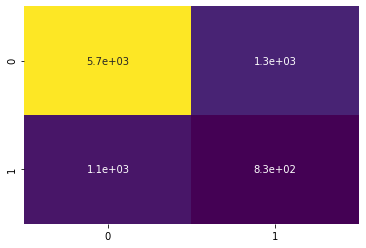

In [318]:
sns.heatmap(confusion_matrix(y_test, Predictions), annot=True, cbar=False, cmap='viridis')

### Naive Bayes - Gaussian NB

In [319]:
nbg = GaussianNB()

In [320]:
nbg.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [321]:
Predictions = nbg.predict(X_test)

In [322]:
print(confusion_matrix(y_test, Predictions))
print('/n')
print(classification_report(y_test, Predictions))

[[1425 5633]
 [ 177 1765]]
/n
              precision    recall  f1-score   support

           0       0.89      0.20      0.33      7058
           1       0.24      0.91      0.38      1942

    accuracy                           0.35      9000
   macro avg       0.56      0.56      0.35      9000
weighted avg       0.75      0.35      0.34      9000



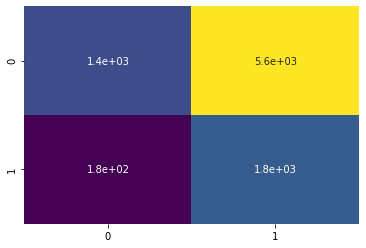

In [323]:
sns.heatmap(confusion_matrix(y_test, Predictions), annot=True, cbar=False, cmap='viridis')

### Neural Network

In [357]:
sc = MinMaxScaler()

In [358]:
sc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [365]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [372]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [367]:
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

model.add(Dense(20))

model.compile(optmizer = 'rmsprop', loss = 'mse')

In [368]:
model.fit(X_train,y_train, epochs=500)

Train on 21000 samples
Epoch 1/500
21000/21000 [==============================] - 4s 192us/sample - loss: 0.1771
Epoch 2/500
21000/21000 [==============================] - 2s 90us/sample - loss: 0.1729
Epoch 3/500
21000/21000 [==============================] - 2s 91us/sample - loss: 0.1726
Epoch 4/500
21000/21000 [==============================] - 2s 90us/sample - loss: 0.1723
Epoch 5/500
21000/21000 [==============================] - 2s 91us/sample - loss: 0.1722
Epoch 6/500
21000/21000 [==============================] - 2s 93us/sample - loss: 0.1720
Epoch 7/500
21000/21000 [==============================] - 2s 92us/sample - loss: 0.1719
Epoch 8/500
21000/21000 [==============================] - 2s 95us/sample - loss: 0.1717
Epoch 9/500
21000/21000 [==============================] - 2s 92us/sample - loss: 0.1715
Epoch 10/500
21000/21000 [==============================] - 2s 95us/sample - loss: 0.1710
Epoch 11/500
21000/21000 [==============================] - 2s 91us/sample - loss: 0.

In [369]:
loss_df = pd.DataFrame(model.history.history)

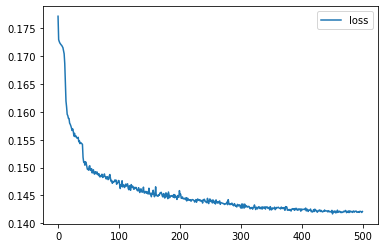

In [370]:
loss_df.plot()

In [373]:
model.evaluate(X_test,y_test, verbose=0)

0.14376725057760875

In [375]:
pred = model.predict(X_test)

In [379]:
test_predictions = pd.Series(pred.reshape(180000,))

In [380]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [381]:
pred_df = pd.concat([pred_df, test_predictions],axis=1)

In [382]:
pred_df.columns = ['Test True Y','Predictions']

In [392]:
pred_df.head(10)

,Test True Y,Predictions
0,0.0,0.144267
1,0.0,0.145224
2,0.0,0.143605
3,0.0,0.143308
4,1.0,0.144710
5,0.0,0.144995
6,1.0,0.145782
7,0.0,0.145495
8,0.0,0.144208
9,0.0,0.145611
